실습
===
신용카드 연체 예측 데이터 PCA
---
### 1. credit card 데이터 세트 변환
* 신용카드 연체 예측(UCI credit card default data)
* 데이터 전처리 : 컬럼명 변경, 속성/클래스 분류

In [58]:
# 신용카드 연체 예측(UCI credit card default data)
# 예제 : credit card 데이터 세트 변환
import pandas as pd

df = pd.read_csv("./csv_data/UCI_Credit_Card.csv", encoding="CP949")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [60]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [61]:
# 컬럼명 변경
df = df.rename(columns={"PAY_0" : "PAY_1", "default.payment.next.month" : "default"})
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [62]:
# 속성과 클래스로 데이터 분류
y_target = df["default"]
X_features = df.drop("default", axis=1)

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X_features.corr()
corr

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_1,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565


### 2. 피처 간 상관관계 살펴보기
* 히트맵으로 피처 간 상관관계 시각화
  * 과거 지불 금액간 상관관계 높음.
  * 과거 청구 금액간 상관관계는 더 높음.
  * 상관도가 높은 피처들 간에는 PCA 효율이 좋음.

<AxesSubplot:>

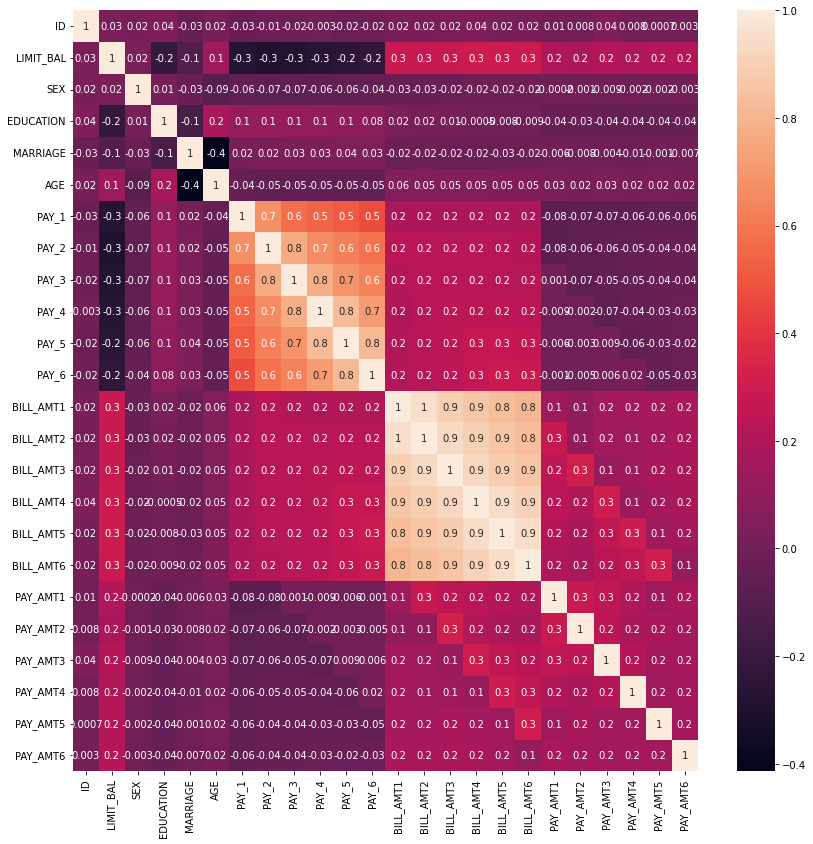

In [64]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt=".1g")

### 3. 일부 피처들 PCA 변환(n_components=2)
* 일부 상관도가 높은 피처들(BILL_AMT1~6)을 PCA(n_components=2) 변환 후 변동성 확인

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ["BILL_AMT" + str(i) for i in range(1, 7)]
print(f"대상 속성명 : {cols_bill}")

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca_2 = PCA(n_components=2)
pca_2.fit(df_cols_scaled)

df_bill=pca_2.transform(df_cols_scaled)

print(f"PCA Component별 변동성 : {pca_2.explained_variance_ratio_}")

# 6개의 피처를 2개의 피처로 PCA 변환했을 때 첫번째 컴포넌트가 전체 변동성의 90%를 설명함.

대상 속성명 : ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성 : [0.90555253 0.0509867 ]


In [66]:
# PAY의 경우
cols_pay = ["PAY_AMT" + str(i) for i in range(1, 7)]
print(f"대상 속성명 : {cols_pay}")

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit() 호출
scaler = StandardScaler()
df_pay_cols_scaled = scaler.fit_transform(X_features[cols_pay])

pca_pay_2 = PCA(n_components=2)
pca_pay_2.fit(df_pay_cols_scaled)

df_pay = pca_pay_2.transform(df_pay_cols_scaled)

print(f"PCA Component별 변동성 : {pca_pay_2.explained_variance_ratio_}")

# PAY 피처는 6개를 2개로 PCA 변환했을 때 첫번째 컴포넌트가 전체 변동성의 32%를 설명함.

대상 속성명 : ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
PCA Component별 변동성 : [0.32628881 0.14890021]


### 4. 전체 피처들 PCA 변환(n_components=7)
* 전체 원본 데이터와 PCA 변환된 데이터 간 랜덤 포레스트 예측 성능 비교

In [67]:
# 1. 원본 데이터
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)

# 원본 데이터일 때 랜덤 포레스트 예측 성능
scores = cross_val_score(rcf, X_features, y_target, scoring="accuracy", cv=3)

print(f"CV=3 인 경우의 개별 Fold세트별 정확도 : {scores}")
print(f"평균 정확도 : {np.mean(scores):.4f}")

CV=3 인 경우의 개별 Fold세트별 정확도 : [0.257  0.8209 0.784 ]
평균 정확도 : 0.6206


In [68]:
# 2. PCA 변환된 데이터
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# PCA 변환을 수행하고 랜덤 포레스트 예측 성능
pca_7 = PCA(n_components=7)
df_pca_7 = pca_7.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca_7, y_target, scoring="accuracy", cv=3)

print(f"CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도 : {scores_pca}")
print(f"PCA 변환 데이터 셋 평균 정확도 : {np.mean(scores_pca):.4f}")

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도 : [0.7849 0.7992 0.8067]
PCA 변환 데이터 셋 평균 정확도 : 0.7969


### 5. PCA 수행한 새로운 데이터 프레임 분석

In [69]:
cols = cols_bill+cols_pay
df_new = df.drop(cols, axis=1)

PCA_BILL = pd.DataFrame(df_bill, columns=["PCA_BILL_1", "PCA_BILL_2"])
PCA_PAY = pd.DataFrame(df_pay, columns=["PCA_PAY_1", "PCA_PAY_2"])

df_new = df_new.merge(PCA_BILL, left_index=True, right_index=True)
df_new = df_new.merge(PCA_PAY, left_index=True, right_index=True)
df_new

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,PCA_BILL_1,PCA_BILL_2,PCA_PAY_1,PCA_PAY_2
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,1,-1.611148,0.012479,-0.721590,0.087850
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,1,-1.547595,-0.062344,-0.625405,0.051993
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,0,-1.035874,0.011256,-0.491177,-0.043324
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,0,-0.250712,0.174374,-0.539174,0.090582
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,0,-0.968951,-0.213032,0.534051,0.700875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,0,2.610194,2.419078,0.219977,0.334112
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,0,-1.521009,-0.066271,-0.388148,0.309469
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,1,-1.195519,-0.359507,0.027987,0.277434
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,1,-0.008293,-0.049958,3.002147,-0.502752


In [73]:
X_PCA_features = df_new.drop(["default"], axis=1)

In [75]:
rcf = RandomForestClassifier(n_estimators=300, random_state=156)

# pca 수행 후 성능 측정
scores_pca = cross_val_score(rcf, X_PCA_features, y_target, scoring="accuracy", cv=3)

print(f"CV=3 인 경우의 PCA 변환 후 개별 Fold세트별 정확도 : {scores_pca}")
print(f"PCA 변환 시 평균 정확도 : {np.mean(scores_pca):.4f}")

# 원본의 경우
# CV=3 인 경우의 개별 Fold세트별 정확도 : [0.257  0.8209 0.784 ]
# 평균 정확도 : 0.6206

CV=3 인 경우의 PCA 변환 후 개별 Fold세트별 정확도 : [0.2314 0.8204 0.7793]
PCA 변환 시 평균 정확도 : 0.6104
